In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix


In [2]:
glass=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data')
glass.columns=['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']

In [3]:
glass

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
6,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
7,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
8,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1
9,11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1


In [11]:
df=pd.DataFrame(glass)
correlation=df.corr('pearson')
abs(correlation['Type of glass']).sort_values()

Ca               0.000372
K                0.012765
Si               0.147767
RI               0.161322
Fe               0.191090
Na               0.504983
Ba               0.574896
Al               0.597754
Mg               0.744004
Id number        0.878113
Type of glass    1.000000
Name: Type of glass, dtype: float64

In [12]:
x1=np.array(df['Mg'])
x2=np.array(df['Al'])
y=np.array(df['Type of glass'])

In [13]:
x=np.column_stack((x1,x2))

In [14]:
x.shape

(213, 2)

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

In [16]:
scaler=MinMaxScaler()

In [17]:
x_train=scaler.fit_transform(xtrain)
x_test=scaler.fit_transform(xtest)

In [18]:
int(np.sqrt(len(x_train)))

12

In [19]:
classifier=KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)

In [20]:
classifier.fit(x_train,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [21]:
y_pred=classifier.predict(x_test)

In [22]:
y_pred

array([7, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 7, 1,
       1, 2, 7, 2, 5, 7, 1, 1, 1, 1, 1, 1, 2, 2, 1, 7, 2, 7, 1, 2, 7, 1,
       7, 1, 2, 2, 2, 1, 2, 1, 1, 7], dtype=int64)

In [23]:
cm=confusion_matrix(ytest,y_pred)

In [24]:
cm

array([[11,  3,  0,  0,  0,  0],
       [11,  5,  0,  0,  0,  1],
       [ 4,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  1,  0,  1],
       [ 0,  5,  0,  0,  0,  1],
       [ 0,  2,  0,  0,  0,  6]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

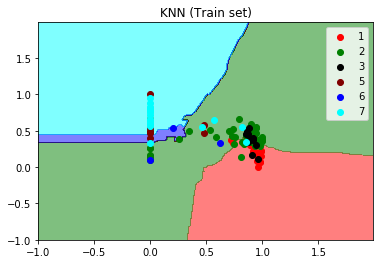

In [27]:
#to plot the clustering
X_set,y_set=x_train,ytrain

X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.5,cmap=ListedColormap(('red','green','black','maroon','blue','cyan')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('red','green','black','maroon','blue','cyan'))(i),label=j)
plt.title('KNN (Train set)')
plt.legend()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

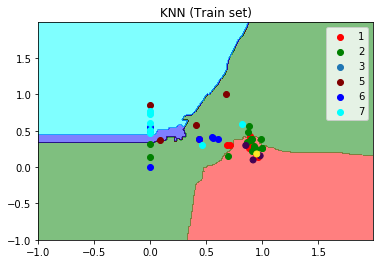

In [28]:
X_set,y_set=x_test,ytest

X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                  np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.5,cmap=ListedColormap(('red','green','black','maroon','blue','cyan')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c=ListedColormap(('red','green','black','maroon','blue','cyan'))(i),label=j)
plt.title('KNN (Train set)')
plt.legend()

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,y_pred))

0.42592592592592593
